#                     **Asteriod Threat Detection**




---
CSE437 Section: 01

Members:
1. Salman Alam (19301037)
2. Atquiya Labiba Oni (19301039)
3. Asif Mosharrof Hossain (19201006)
4. Jubair Samir (19101571/22241149)
---
Dataset: https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects

# ***Load Dataset***

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#importing data preprocessing libraries
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

#import models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

#importing outcome techniques
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
asteriod = pd.read_csv('/content/drive/MyDrive/CSE437_Project/neo.csv')
asteriod

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


# ***Data Visualization & Analysis***

In [ ]:
asteriod.shape
# Columns: 10
# Rows: 90836

(90836, 10)

### Handle Null values

In [ ]:
asteriod.isnull().sum()
#No missing values to handle

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

### Dist-Plot

In [ ]:
# The columns with numerical values
asteriod.select_dtypes(include=np.number).columns

Index(['id', 'est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude'],
      dtype='object')

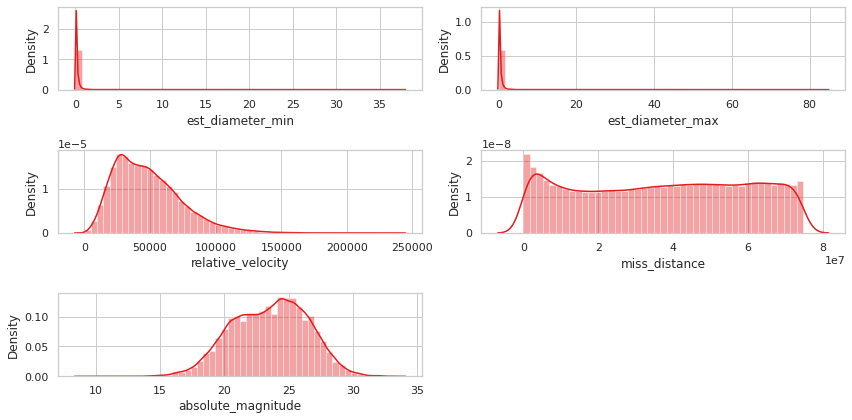

In [ ]:
distPlotColumns=['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude']

rows=3
cols=2
counter=1
plt.rcParams['figure.figsize']=[12,6]
for i in distPlotColumns:
    plt.subplot(rows,cols,counter)
    sns.distplot(asteriod[i])
    counter+=1
plt.tight_layout()
plt.show()

Deductions:

*   Follows Gaussian distribution
*   so, standard scaler is better
*   High skewness in est_diameter_min and est_diameter_max







### Box-Plot

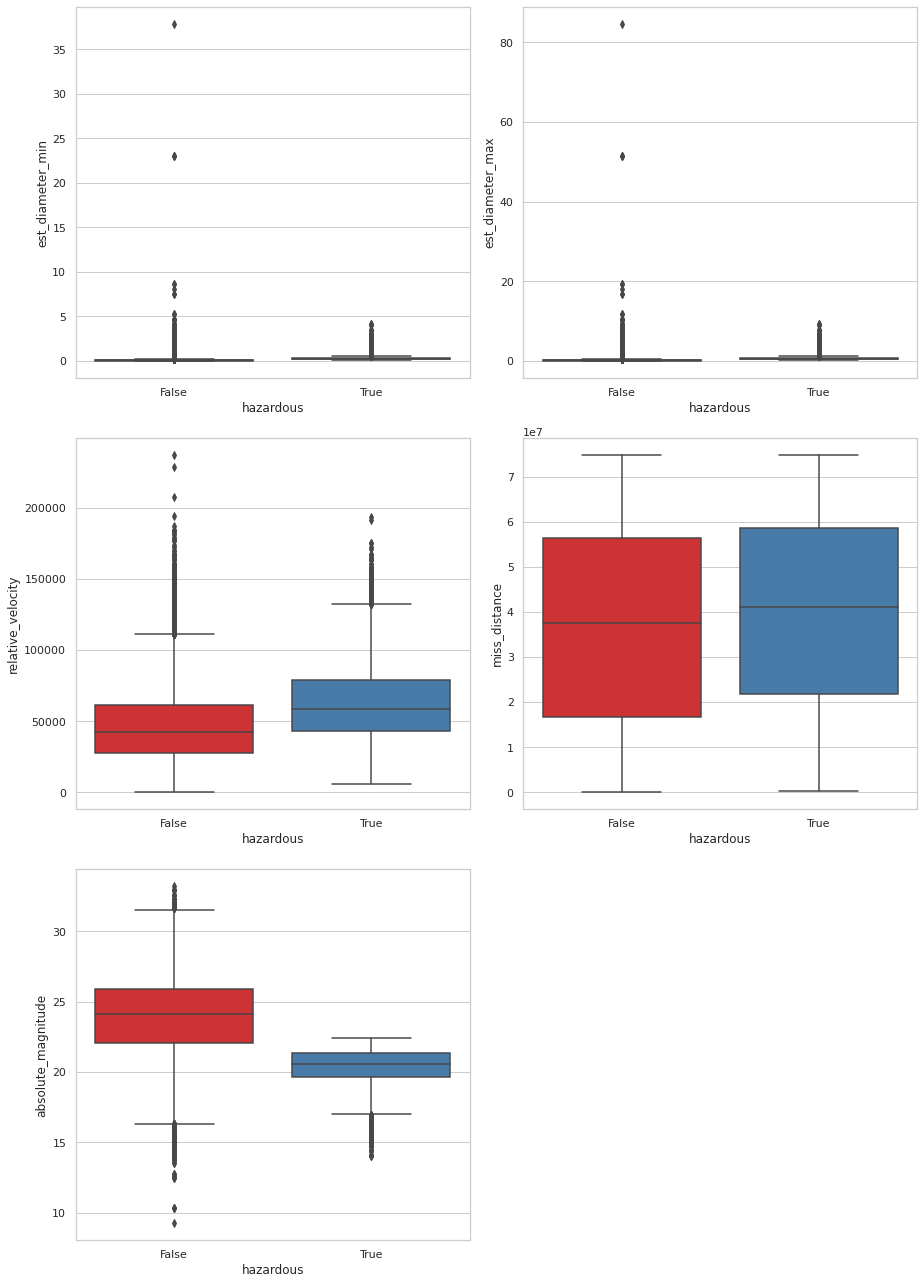

In [ ]:
boxPlotColumns=['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude']

rows=3
cols=2
counter=1
plt.rcParams['figure.figsize']=[13, 18]
sns.set(style="whitegrid")
sns.set_palette("Set1")

for i in boxPlotColumns:
    plt.subplot(rows,cols,counter)
    sns.boxplot(data=asteriod, x='hazardous', y=asteriod[i])
    counter+=1
plt.tight_layout()
plt.show()

Deductions:


*  Need to remove outliers



### Count-Plot

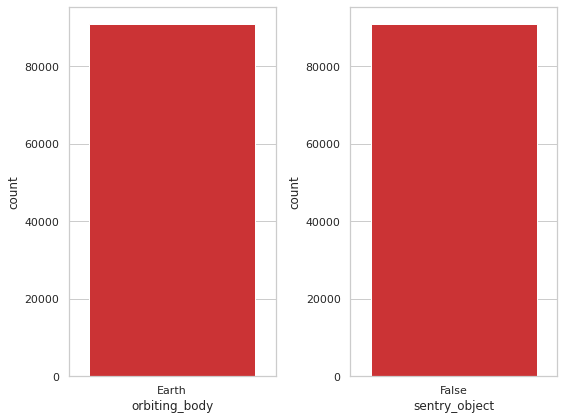

In [ ]:
countPlotColumns=['orbiting_body','sentry_object']

rows=1
cols=2
counter=1
plt.rcParams['figure.figsize']=[8,6]
for i in countPlotColumns:
    plt.subplot(rows,cols,counter)
    sns.countplot(asteriod[i])
    counter+=1
plt.tight_layout()
plt.show()

Deductions:


*   Only 1 unique value in these columns
*   No impact on the label
*   Can be dropped





### Data Imbalance

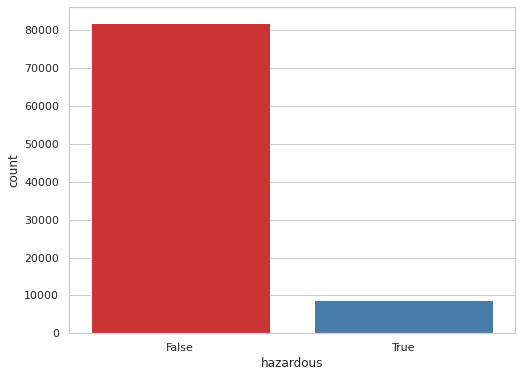

In [ ]:
sns.countplot(x='hazardous',data=asteriod)
plt.show()

### Heat Map

In [ ]:
asteriod.corr()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
id,1.000000,-0.148322,-0.148322,-0.059176,-0.056510,NaN,0.277258,-0.123443
est_diameter_min,-0.148322,1.000000,1.000000,0.221553,0.142241,NaN,-0.560188,0.183363
est_diameter_max,-0.148322,1.000000,1.000000,0.221553,0.142241,NaN,-0.560188,0.183363
relative_velocity,-0.059176,0.221553,0.221553,1.000000,0.327169,NaN,-0.353863,0.191185
miss_distance,-0.056510,0.142241,0.142241,0.327169,1.000000,NaN,-0.264168,0.042302
sentry_object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absolute_magnitude,0.277258,-0.560188,-0.560188,-0.353863,-0.264168,NaN,1.000000,-0.365267
hazardous,-0.123443,0.183363,0.183363,0.191185,0.042302,NaN,-0.365267,1.000000


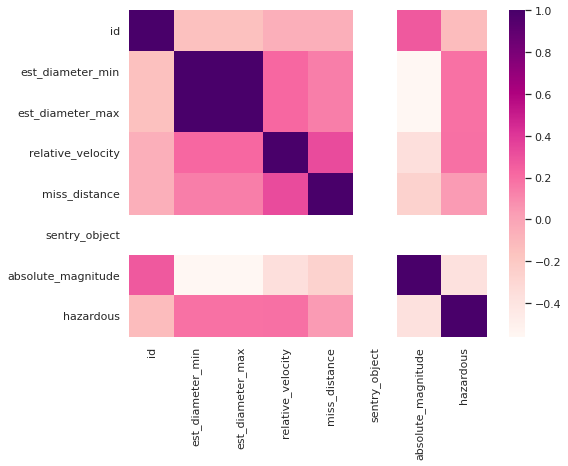

In [ ]:
sns.heatmap(asteriod.corr(),cmap='RdPu')
plt.show()

# ***Data Pre-processing***

### Drop Columns

In [ ]:
to_drop = ['id', 'name', 'orbiting_body', 'sentry_object']

# Drop those columns from the DataFrame
asteriod = asteriod.drop(to_drop, axis=1)
asteriod

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


### Encode categorical features

In [ ]:
asteriod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
 5   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 3.6 MB


In [ ]:
asteriod['hazardous'].unique()

array([False,  True])

In [ ]:
enc = LabelEncoder()

asteriod['hazardous'] = enc.fit_transform(asteriod['hazardous'])

asteriod

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,0
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,0
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,0
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,0


### Data Normalization

In [ ]:
## storing names of columns in Column_Names
Column_Names=['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'absolute_magnitude']

for j in Column_Names:
  asteriod[j],_ = stats.boxcox(asteriod[j])

asteriod

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.180194,0.965465,84.705922,5.483974e+07,34.507344,0
1,-1.362597,-0.526022,158.954119,6.143813e+07,44.336306,1
2,-0.327928,0.474240,187.001659,4.979872e+07,37.739312,0
3,-2.456883,-1.583919,106.085799,2.543497e+07,51.307005,0
4,-1.406455,-0.568422,129.966715,4.627557e+07,44.616022,1
...,...,...,...,...,...,...
90831,-3.918721,-2.997146,139.855294,1.230039e+07,60.562331,0
90832,-4.460304,-3.520719,133.687036,5.432121e+07,63.966466,0
90833,-3.705006,-2.790537,67.976033,2.840077e+07,59.214921,0
90834,-5.461963,-4.489069,155.378715,6.869206e+07,70.218862,0


**Box-Cox Transformation Formula:**

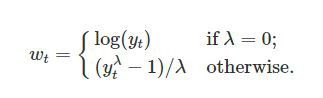

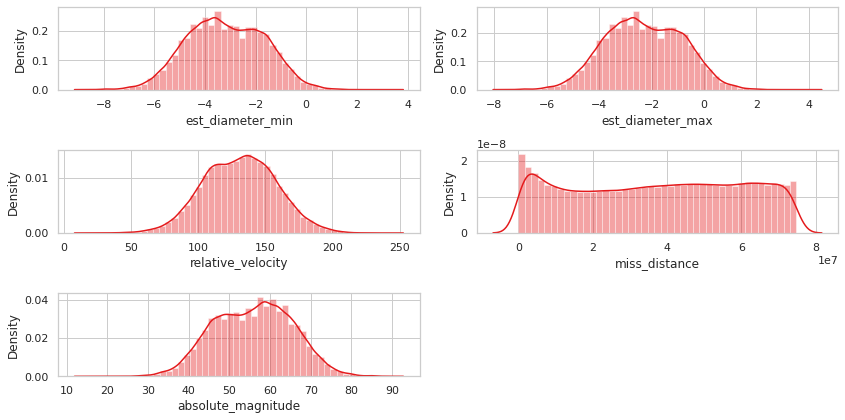

In [ ]:
distPlotColumns=['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude']

rows=3
cols=2
counter=1
plt.rcParams['figure.figsize']=[12,6]
for i in distPlotColumns:
    plt.subplot(rows,cols,counter)
    sns.distplot(asteriod[i])
    counter+=1
plt.tight_layout()
plt.show()

### Remove Outliers

In [ ]:
## storing names of columns in Column_Names
Column_Names=['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'absolute_magnitude']

for j in Column_Names:
  asteriod['zscore'] = (asteriod[j] - asteriod[j].mean())/asteriod[j].std()
  asteriod.loc[((asteriod.zscore>2) | (asteriod.zscore<-2)), j] = np.nan

asteriod = asteriod.drop('zscore', axis=1)
asteriod

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,NaN,NaN,84.705922,5.483974e+07,NaN,0
1,-1.362597,-0.526022,158.954119,6.143813e+07,44.336306,1
2,-0.327928,0.474240,NaN,4.979872e+07,37.739312,0
3,-2.456883,-1.583919,106.085799,2.543497e+07,51.307005,0
4,-1.406455,-0.568422,129.966715,4.627557e+07,44.616022,1
...,...,...,...,...,...,...
90831,-3.918721,-2.997146,139.855294,1.230039e+07,60.562331,0
90832,-4.460304,-3.520719,133.687036,5.432121e+07,63.966466,0
90833,-3.705006,-2.790537,NaN,2.840077e+07,59.214921,0
90834,-5.461963,-4.489069,155.378715,6.869206e+07,70.218862,0


In [ ]:
asteriod.isnull().sum()

est_diameter_min      3067
est_diameter_max      3067
relative_velocity     3788
miss_distance            0
absolute_magnitude    2970
hazardous                0
dtype: int64

### Null-Value Imputation

In [ ]:
imputer = KNNImputer(n_neighbors=2)
asteriod = pd.DataFrame(imputer.fit_transform(asteriod), columns = asteriod.columns)

In [ ]:
asteriod.isnull().sum()

est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

### Feature Selection

In [ ]:
asteriod.columns

Index(['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude', 'hazardous'],
      dtype='object')

In [ ]:
# Feature Selection
features = ['est_diameter_min', 'est_diameter_max',	'relative_velocity',	'miss_distance',	'absolute_magnitude']
label = ['hazardous']

In [ ]:
X = asteriod.loc[:, features]
y = asteriod.loc[:, label]

### Handling Imbalanced Data: Upsampling

In [ ]:
asteriod['hazardous'].value_counts()

0.0    81996
1.0     8840
Name: hazardous, dtype: int64

In [ ]:
oversample = SMOTE()
X_upsampled, y_upsampled = oversample.fit_resample(X, y)


*   SMOTE synthesises new minority instances
*   generates the virtual training records by linear interpolation
*   generated by randomly selecting one or more of the k-nearest neighbors



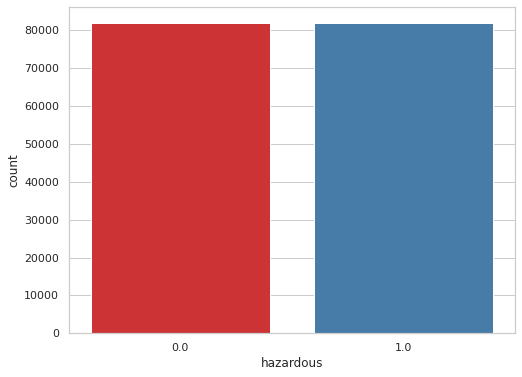

In [ ]:
plt.rcParams['figure.figsize']=[8,6]
sns.countplot(x='hazardous',data=y_upsampled)
plt.show()

### Split the dataset

In [ ]:

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                random_state=0,train_size=0.75, stratify = y)

print(X_train.shape)
print(X_test.shape)

(68127, 5)
(22709, 5)


In [ ]:

X_train_upsampled,X_test_upsampled,y_train_upsampled,y_test_upsampled = train_test_split(X_upsampled,y_upsampled,
                                                                                         random_state=0,train_size=0.75, stratify = y_upsampled)

print(X_train_upsampled.shape)
print(X_test_upsampled.shape)

(122994, 5)
(40998, 5)


### Scale Dataset

**Standard Scaler:**

$$\frac{X - mean}{\sigma}$$
where,
$$\sigma = standard \space deviation $$

In [ ]:
scaler = StandardScaler()
train_scaled=pd.DataFrame(scaler.fit_transform(X_train)) # Scaling the train set
test_scaled=pd.DataFrame(scaler.transform(X_test)) # Scaling the test set

print(X_train)

       est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
71722         -3.177900         -2.280960         138.979715   1.679370e+07   
83361         -2.660898         -1.781150         176.079305   1.247664e+07   
69126         -2.456883         -1.583919         110.760647   3.630628e+07   
71102         -5.236347         -4.270955         167.375329   8.200323e+06   
112           -4.460304         -3.520719          94.894485   3.061760e+05   
...                 ...               ...                ...            ...   
3816          -4.790321         -3.839761         146.424962   5.518760e+07   
49334         -3.651835         -2.739134         131.130674   2.405627e+07   
69634         -3.021748         -2.130000         100.412608   2.987091e+07   
73043         -2.355466         -1.485874         125.191856   8.239662e+06   
36223         -3.865137         -2.945343         131.648830   1.131423e+07   

       absolute_magnitude  
71722           55.8827

In [ ]:
scaler = StandardScaler()
train_scaled_upsampled = pd.DataFrame(scaler.fit_transform(X_train_upsampled)) # Scaling the train set
test_scaled_upsampled = pd.DataFrame(scaler.transform(X_test_upsampled)) # Scaling the test set

print(X_train_upsampled)

        est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
36846          -3.492939         -2.585522         111.154610   2.418873e+07   
85172          -1.943736         -1.087836         153.022332   3.499005e+07   
162946         -2.304349         -1.436458         177.049523   6.795938e+07   
144786         -0.828778         -0.009954         158.672541   2.224026e+06   
9278           -3.334962         -2.432799         122.539184   4.134225e+07   
...                  ...               ...                ...            ...   
113899         -1.089623         -0.262125         157.708155   6.192646e+07   
72564          -2.143764         -1.281212         167.347775   4.084055e+07   
77459          -3.230153         -2.331475         110.751853   1.973904e+07   
87293          -2.123691         -1.261807         169.216691   5.116298e+07   
160311         -1.833060         -0.980841         156.637930   4.175145e+07   

        absolute_magnitude  
36846     

# ***Apply ML Models***

In [ ]:
def printOutcome(outcomes):
  print('Accuracy of predictions on Train set:',round(outcomes[0][0]*100,2),'%')
  print('Accuracy of predictions on Test set:',round(outcomes[0][1]*100,2),'%')
  print()

  print('Precision of predictions on Train set:',round(outcomes[1][0]*100,2),'%')
  print('Precision of predictions on Test set:',round(outcomes[1][1]*100,2),'%')
  print()

  print('Recall of predictions on Train set:',round(outcomes[2][0]*100,2),'%')
  print('Recall of predictions on Test set:',round(outcomes[2][1]*100,2),'%')
  print()

  print('f1 score of predictions on Train set:',round(outcomes[3][0]*100,2),'%')
  print('f1 score of predictions on Test set:',round(outcomes[3][1]*100,2),'%')
  print()

In [ ]:
outcomeData = []
def outcomeCalc(predict_train, predict_test, Y_train, Y_test):
  modelOutcome = []

  # Accuracy Calculation
  acc_train=accuracy_score(Y_train,predict_train)
  acc_test=accuracy_score(Y_test,predict_test)
  modelOutcome.append([acc_train,acc_test])

  # Precision Calculation
  precision_train=precision_score(Y_train,predict_train)
  precision_test=precision_score(Y_test,predict_test)
  modelOutcome.append([precision_train,precision_test])

  #Recall Calculation
  recall_train=recall_score(Y_train,predict_train)
  recall_test=recall_score(Y_test,predict_test)
  modelOutcome.append([recall_train,recall_test])

  # f1 Calculation
  f1_train=f1_score(Y_train,predict_train)
  f1_test=f1_score(Y_test,predict_test)
  modelOutcome.append([f1_train,f1_test])

  if modelOutcome not in outcomeData:
    outcomeData.append(modelOutcome)
  printOutcome(modelOutcome)

In [ ]:
def confusionMatrix(predict_test, Y_test):
  # Calculate the confusion matrix
  conf_matrix = confusion_matrix(y_true=Y_test, y_pred=predict_test)

  #Print confusion matrix
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

## AdaBoost Classifier

### Before Resample

Accuracy of predictions on Train set: 90.95 %
Accuracy of predictions on Test set: 90.94 %

Precision of predictions on Train set: 71.83 %
Precision of predictions on Test set: 72.75 %

Recall of predictions on Train set: 11.46 %
Recall of predictions on Test set: 11.0 %

f1 score of predictions on Train set: 19.77 %
f1 score of predictions on Test set: 19.1 %



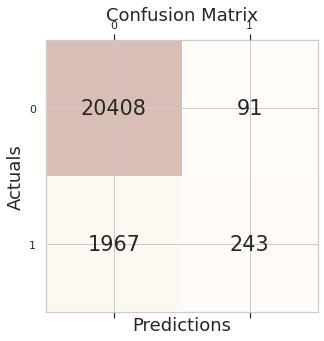

In [ ]:
ADA_Model=AdaBoostClassifier(n_estimators=50, random_state=0) # Machine Instance
ADA_Model.fit(train_scaled,y_train)# Training the model

# Predictions made
predict_train=ADA_Model.predict(train_scaled)
predict_test=ADA_Model.predict(test_scaled)

#Generate Outcomes
outcomeCalc(predict_train, predict_test, y_train, y_test)

#Confusion Matrix
confusionMatrix(predict_test, y_test)

### After Resample

Accuracy of predictions on Train set: 86.53 %
Accuracy of predictions on Test set: 86.55 %

Precision of predictions on Train set: 81.53 %
Precision of predictions on Test set: 81.67 %

Recall of predictions on Train set: 94.44 %
Recall of predictions on Test set: 94.26 %

f1 score of predictions on Train set: 87.51 %
f1 score of predictions on Test set: 87.52 %



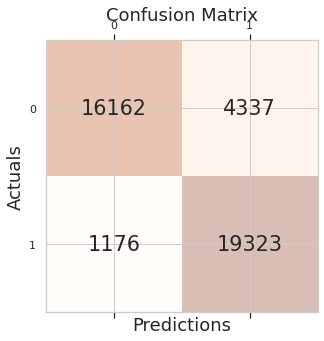

In [ ]:
ADA_Model=AdaBoostClassifier(n_estimators=50, random_state=0) # Machine Instance
ADA_Model.fit(train_scaled_upsampled,y_train_upsampled)# Training the model

# Predictions made
predict_train=ADA_Model.predict(train_scaled_upsampled)
predict_test=ADA_Model.predict(test_scaled_upsampled)

#Generate Outcomes
outcomeCalc(predict_train, predict_test, y_train_upsampled, y_test_upsampled)

#Confusion Matrix
confusionMatrix(predict_test, y_test_upsampled)

## Random Forest

### Before Resample

Accuracy of predictions on Train set: 99.97 %
Accuracy of predictions on Test set: 91.37 %

Precision of predictions on Train set: 100.0 %
Precision of predictions on Test set: 59.17 %

Recall of predictions on Train set: 99.7 %
Recall of predictions on Test set: 36.65 %

f1 score of predictions on Train set: 99.85 %
f1 score of predictions on Test set: 45.26 %



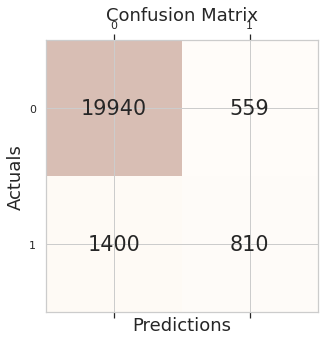

In [ ]:
RF_Model = RandomForestClassifier(n_estimators = 50)  # Machine Instance
RF_Model.fit(train_scaled,y_train) # Training the model

# Predictions made
predict_train=RF_Model.predict(train_scaled)
predict_test=RF_Model.predict(test_scaled)

#Generate Outcomes
outcomeCalc(predict_train, predict_test, y_train, y_test)

#Confusion Matrix
confusionMatrix(predict_test, y_test)

### After Resample

Accuracy of predictions on Train set: 99.98 %
Accuracy of predictions on Test set: 92.81 %

Precision of predictions on Train set: 99.98 %
Precision of predictions on Test set: 93.38 %

Recall of predictions on Train set: 99.97 %
Recall of predictions on Test set: 92.15 %

f1 score of predictions on Train set: 99.98 %
f1 score of predictions on Test set: 92.76 %



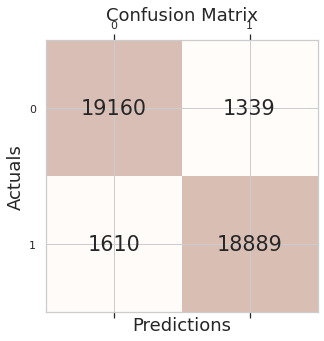

In [ ]:
RF_Model = RandomForestClassifier(n_estimators = 50)  # Machine Instance
RF_Model.fit(train_scaled_upsampled,y_train_upsampled) # Training the model

# Predictions made
predict_train=RF_Model.predict(train_scaled_upsampled)
predict_test=RF_Model.predict(test_scaled_upsampled)

#Generate Outcomes
outcomeCalc(predict_train, predict_test, y_train_upsampled, y_test_upsampled)

#Confusion Matrix
confusionMatrix(predict_test, y_test_upsampled)

## KNN

### Before Resample

Accuracy of predictions on Train set: 92.92 %
Accuracy of predictions on Test set: 90.11 %

Precision of predictions on Train set: 72.25 %
Precision of predictions on Test set: 48.66 %

Recall of predictions on Train set: 44.21 %
Recall of predictions on Test set: 28.73 %

f1 score of predictions on Train set: 54.85 %
f1 score of predictions on Test set: 36.13 %



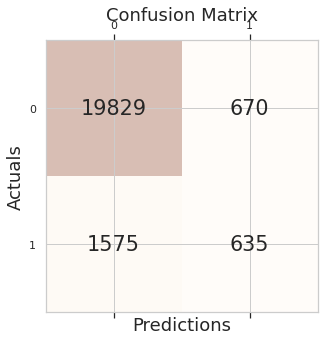

In [ ]:
KNN_Model=KNeighborsClassifier() # Machine Instance
KNN_Model.fit(train_scaled,y_train) # Traing the model

# Predictions made
predict_train=KNN_Model.predict(train_scaled)
predict_test=KNN_Model.predict(test_scaled)

#Generate Outcomes
outcomeCalc(predict_train, predict_test, y_train, y_test)

#Confusion Matrix
confusionMatrix(predict_test, y_test)

### After Resample

Accuracy of predictions on Train set: 88.85 %
Accuracy of predictions on Test set: 85.67 %

Precision of predictions on Train set: 85.35 %
Precision of predictions on Test set: 82.33 %

Recall of predictions on Train set: 93.81 %
Recall of predictions on Test set: 90.85 %

f1 score of predictions on Train set: 89.38 %
f1 score of predictions on Test set: 86.38 %



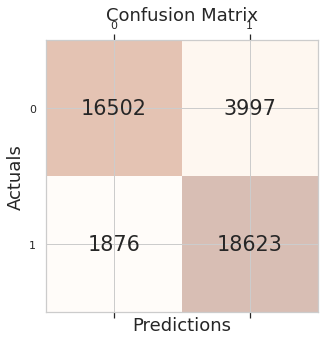

In [ ]:
KNN_Model=KNeighborsClassifier() # Machine Instance
KNN_Model.fit(train_scaled_upsampled,y_train_upsampled) # Traing the model

# Predictions made
predict_train=KNN_Model.predict(train_scaled_upsampled)
predict_test=KNN_Model.predict(test_scaled_upsampled)

#Generate Outcomes
outcomeCalc(predict_train, predict_test, y_train_upsampled, y_test_upsampled)

#Confusion Matrix
confusionMatrix(predict_test, y_test_upsampled)

## Gaussian Naive Bayes

### Before Resample

Accuracy of predictions on Train set: 79.11 %
Accuracy of predictions on Test set: 79.42 %

Precision of predictions on Train set: 29.95 %
Precision of predictions on Test set: 30.41 %

Recall of predictions on Train set: 85.67 %
Recall of predictions on Test set: 86.52 %

f1 score of predictions on Train set: 44.39 %
f1 score of predictions on Test set: 45.0 %



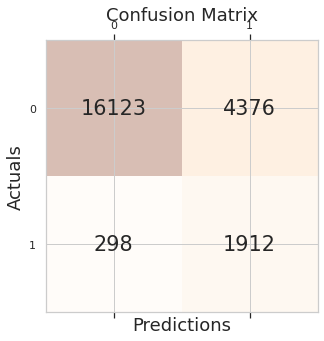

In [ ]:
NB_Model=GaussianNB() # Machine Instance
NB_Model.fit(train_scaled,y_train) # Traing the model

# Predictions made
predict_train=NB_Model.predict(train_scaled)
predict_test=NB_Model.predict(test_scaled)

#Generate Outcomes
outcomeCalc(predict_train, predict_test, y_train, y_test)

#Confusion Matrix
confusionMatrix(predict_test, y_test)

### After Resample

Accuracy of predictions on Train set: 85.14 %
Accuracy of predictions on Test set: 85.13 %

Precision of predictions on Train set: 78.65 %
Precision of predictions on Test set: 78.66 %

Recall of predictions on Train set: 96.47 %
Recall of predictions on Test set: 96.41 %

f1 score of predictions on Train set: 86.65 %
f1 score of predictions on Test set: 86.63 %



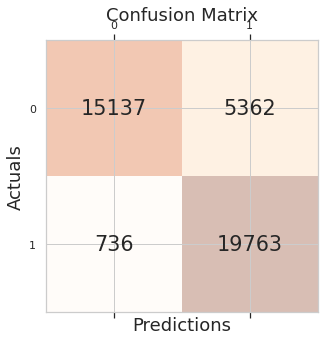

In [ ]:
NB_Model=GaussianNB() # Machine Instance
NB_Model.fit(train_scaled_upsampled,y_train_upsampled) # Traing the model

# Predictions made
predict_train=NB_Model.predict(train_scaled_upsampled)
predict_test=NB_Model.predict(test_scaled_upsampled)

#Generate Outcomes
outcomeCalc(predict_train, predict_test, y_train_upsampled, y_test_upsampled)

#Confusion Matrix
confusionMatrix(predict_test, y_test_upsampled)

# ***Performance Visualization***

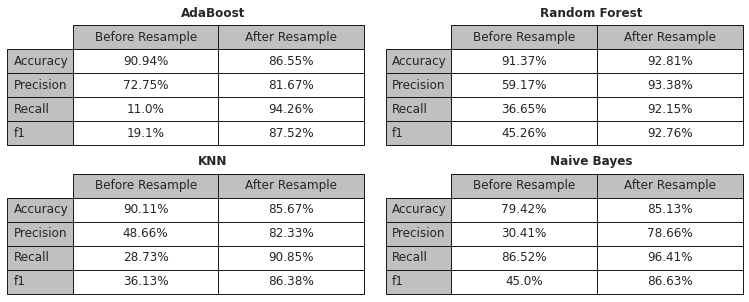

In [ ]:
fig, ax = plt.subplots(2,2)
plt.rcParams['figure.figsize']=[12,5]
plt.subplots_adjust(wspace = 0.3, hspace = 0.2)
title = ['AdaBoost', 'Random Forest', 'KNN', 'Naive Bayes']
counter = 0
data = []

for lst in range(0,len(outcomeData),2):
  temp = []
  for item in range(4):
    temp.append([outcomeData[lst][item][1], outcomeData[lst+1][item][1]])
  data.append(temp)

for j in range(2):
  for k in range(2):
    colNames = [i for i in ['Before Resample', 'After Resample']]
    rowNames = [i for i in ['Accuracy', 'Precision', 'Recall', 'f1']]
    cellValues = [[str(round(c*100,2))+'%' for c in r] for r in data[counter]]

    ax[j,k].set_axis_off()
    ax[j,k].axis('tight')
    table = ax[j,k].table(
        cellText = cellValues,
        rowLabels = rowNames,
        colLabels = colNames,
        rowColours =["silver"] * 4,
        colColours =["silver"] * 2,
        cellLoc ='center',
        loc ='upper left')
    table.scale(1, 2)
    ax[j,k].set_title(title[counter],
                fontweight ="bold")
    counter += 1

plt.show()

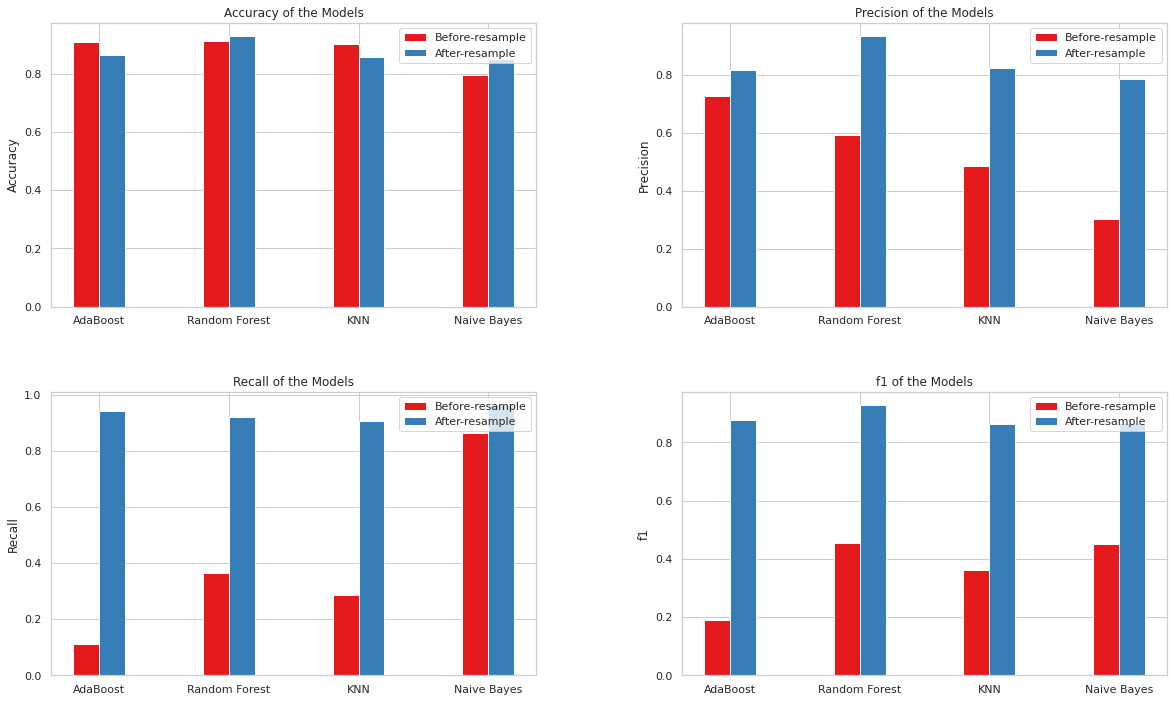

In [ ]:
dataBarBefore = []
dataBarAfter = []

for i in range(4):
  temp1 = []
  temp2 = []
  for j in range(4):
    temp1.append(data[j][i][0])
    temp2.append(data[j][i][1])
  dataBarBefore.append(temp1)
  dataBarAfter.append(temp2)


models = ['AdaBoost', 'Random Forest', 'KNN', 'Naive Bayes']
outcomeLabel = ['Accuracy', 'Precision', 'Recall', 'f1']
fig, ax = plt.subplots(2,2)
plt.rcParams['figure.figsize']=[20,12]
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
counter = 0

for i in range(2):
  for j in range(2):
    x = np.arange(len(models))  # the label locations
    width = 0.2  # the width of the bars

    rects1 = ax[i,j].bar(x - width/2, dataBarBefore[counter], width, label='Before-resample')
    rects2 = ax[i,j].bar(x + width/2, dataBarAfter[counter], width, label='After-resample')

    ax[i,j].set_ylabel(outcomeLabel[counter])
    ax[i,j].set_title(outcomeLabel[counter] + " of the Models")
    ax[i,j].set_xticks(x)
    ax[i,j].set_xticklabels(models)
    ax[i,j].legend()
    counter += 1

plt.show()